In [1]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Скачаем ирисы

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
data.target[[10, 25, 50]]
np.array([0, 0, 1])
list(data.target_names)
['setosa', 'versicolor', 'virginica']

['setosa', 'versicolor', 'virginica']

### Преобразуем данные

In [3]:
type_ = []
for j in range (3) :
    type_.append(np.array([data.data[i] for i in range (150) if data.target[i] == j]))
type_ = np.array(type_)

### Посчитаем векторы средних для каждой компоненты смеси

In [4]:
types_mean = np.array([type_[0].mean(axis=0), type_[1].mean(axis=0), type_[2].mean(axis=0)])
print(types_mean)

[[ 5.006  3.418  1.464  0.244]
 [ 5.936  2.77   4.26   1.326]
 [ 6.588  2.974  5.552  2.026]]


### Посчитаем матрицу ковариаций каждой компонентыпо данной формуле 
### Матрица ковариаций равна $\frac{1}{n}X\cdot X^{T}, где\ X_{i, j} = X_{i}^{j} - \overline{X^j}$

In [5]:
X = np.array(type_)
for i in range(3) : 
    for j in range (4) :
        X[i].T[j] = type_[i].T[j] - types_mean[i][j]

In [6]:
A = []
for i in range(3) :
    A.append(np.dot(X[0].T, X[0])/50)

In [7]:
X = np.array(A)

In [8]:
print(X)

[[[ 0.121764  0.098292  0.015816  0.010336]
  [ 0.098292  0.142276  0.011448  0.011208]
  [ 0.015816  0.011448  0.029504  0.005584]
  [ 0.010336  0.011208  0.005584  0.011264]]

 [[ 0.121764  0.098292  0.015816  0.010336]
  [ 0.098292  0.142276  0.011448  0.011208]
  [ 0.015816  0.011448  0.029504  0.005584]
  [ 0.010336  0.011208  0.005584  0.011264]]

 [[ 0.121764  0.098292  0.015816  0.010336]
  [ 0.098292  0.142276  0.011448  0.011208]
  [ 0.015816  0.011448  0.029504  0.005584]
  [ 0.010336  0.011208  0.005584  0.011264]]]


### Напишем функцию которая для заданной компоненты смеси и для заданных пар координат строит график плотности и также наносит соответствующие проекции точек выборки.

In [15]:
def density_for_component(iris_number, comp1, comp2) :
    t = type_[iris_number]
    
    component1 = t.T[comp1]
    component2 = t.T[comp2]
    #needed mean vector
    mean_vector = types_mean[iris_number]
    #needed covariation matrix
    cov_matrix = X[iris_number]
    
    #my mean vector
    mmv = np.array([mean_vector[comp1], 
                    mean_vector[comp2]]) 
    #my cov matrix
    mcm = np.array([[cov_matrix[comp1][comp1], cov_matrix[comp1][comp2]],
                    [cov_matrix[comp2][comp1], cov_matrix[comp2][comp2]]])
    #print(mcm)
    #my random vector
    mrv = sps.multivariate_normal(mmv, mcm)
    
    plt.figure(figsize=(20, 10))
    
    x = np.linspace(-3, 10, 100)
    y = np.linspace(-3, 10, 100)
    
    x_grid, y_grid = np.meshgrid(x, y)
    density = np.zeros((100, 100))
    for i in range(100) :
        for j in range (100) :
            density[i][j] = mrv.pdf([x[i], y[j]]);
            
    plt.figure(figsize=(20, 10)) 
    plt.title('Component ' + str(iris_number) + '; pair (' + str(comp1) + ', '+ str(comp2) + ')', fontsize=(30))
    CS = plt.contour(x_grid, y_grid, density, [0.005, 0.02, 0.05, 0.085]) 
    p = plt.clabel(CS, fontsize=14, inline=1, fmt='%1.3f') 
    plt.xlim([-3, 10]) 
    plt.ylim([0, 9]) 
    p1 = plt.scatter(component2, component1) 
    
    plt.show()


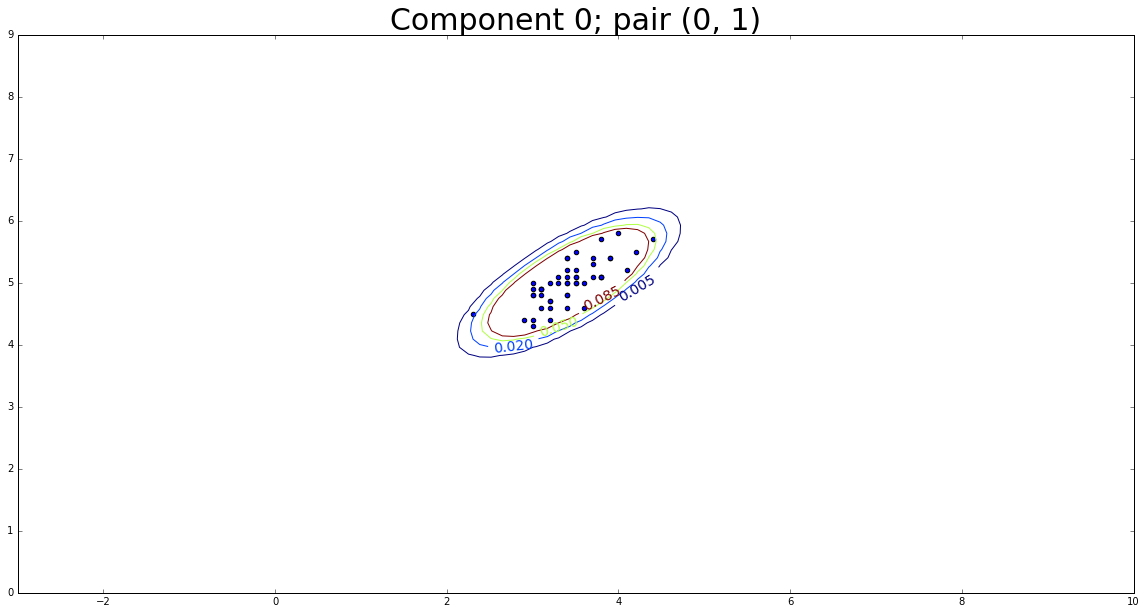

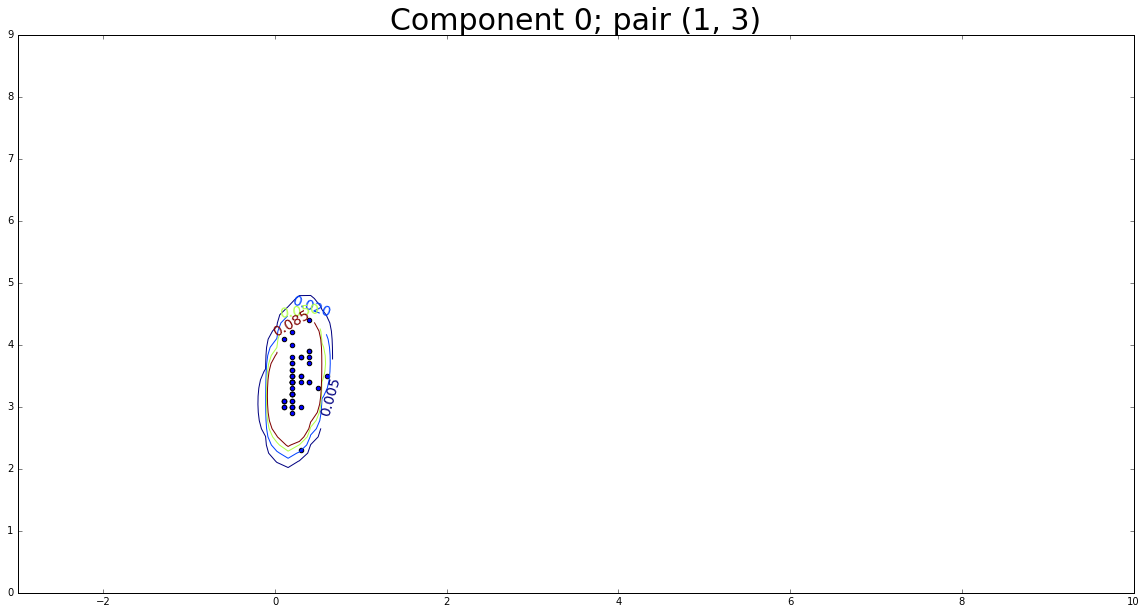

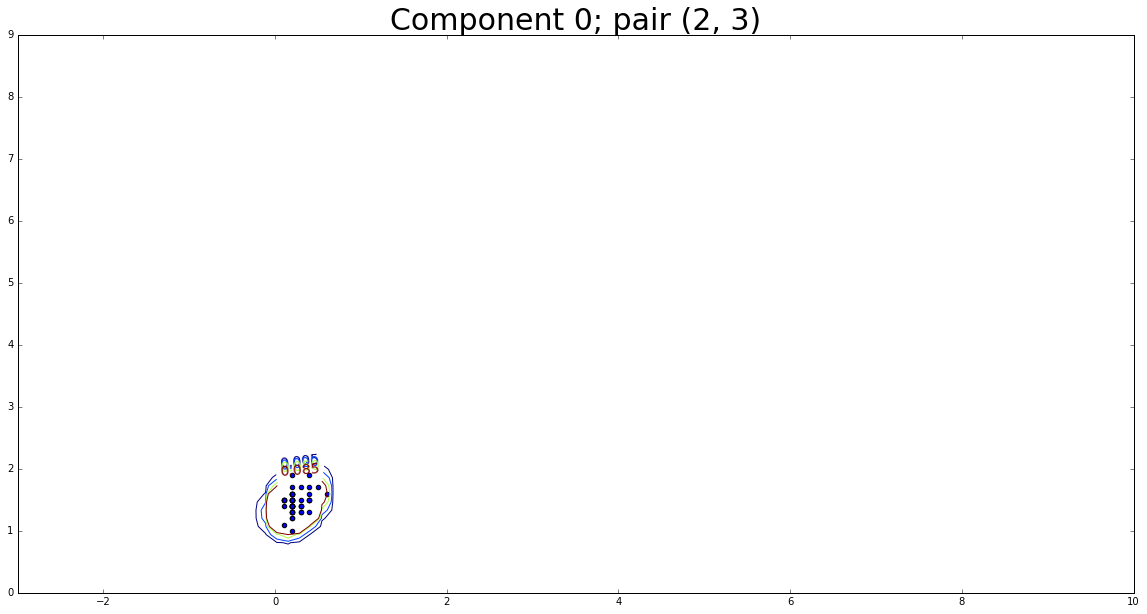

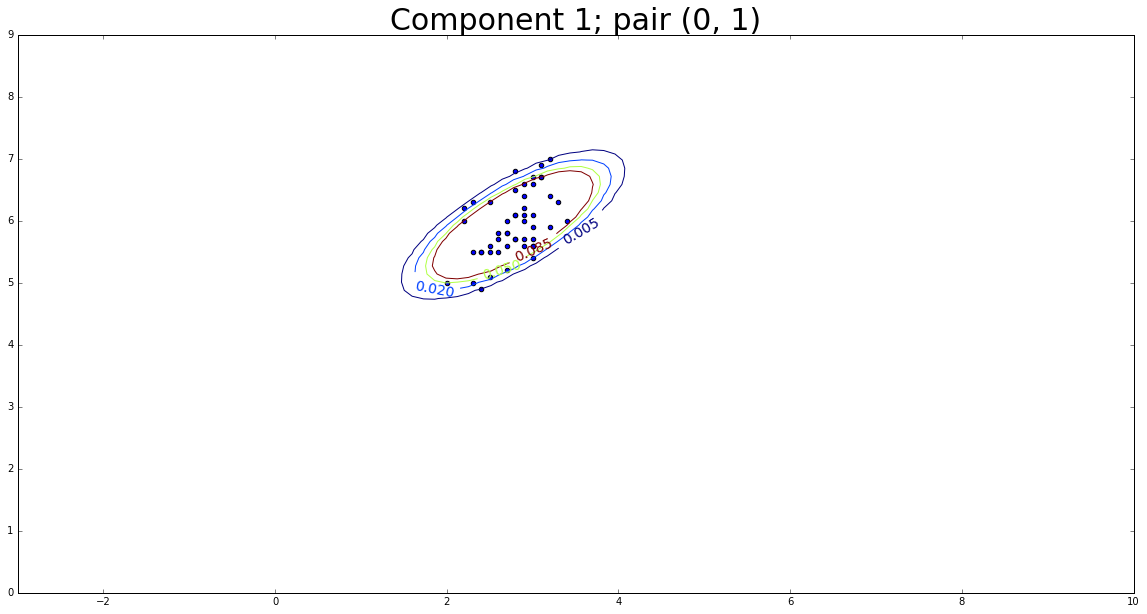

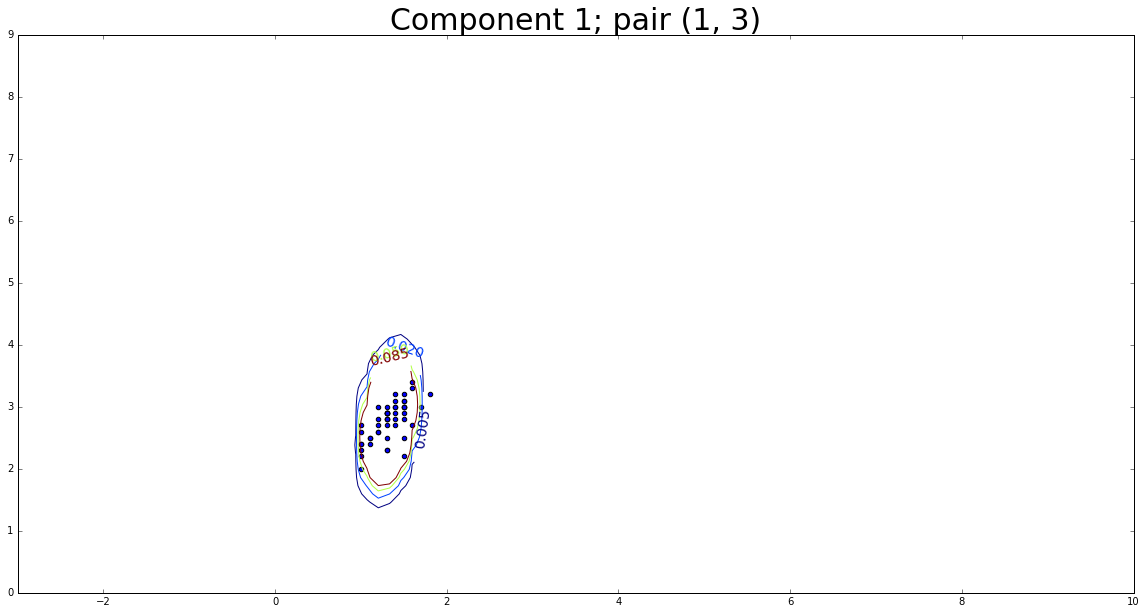

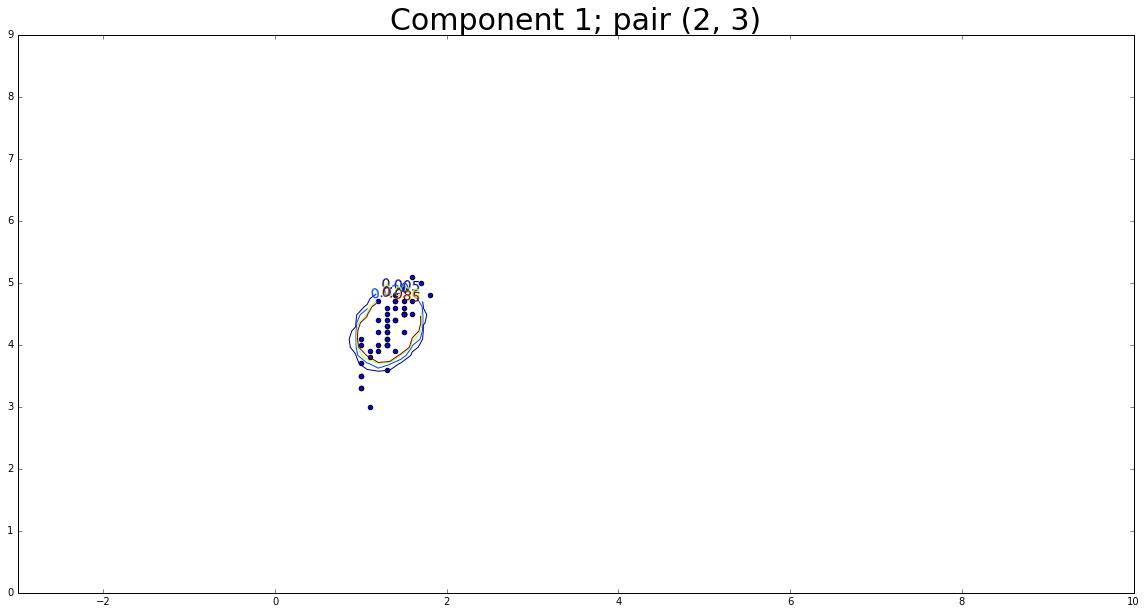

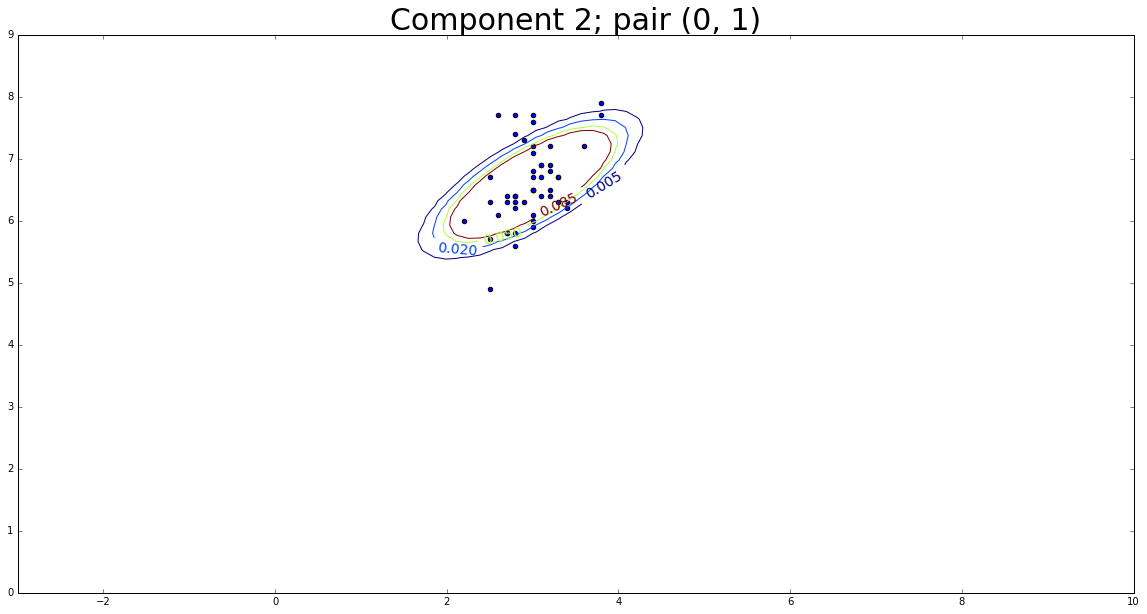

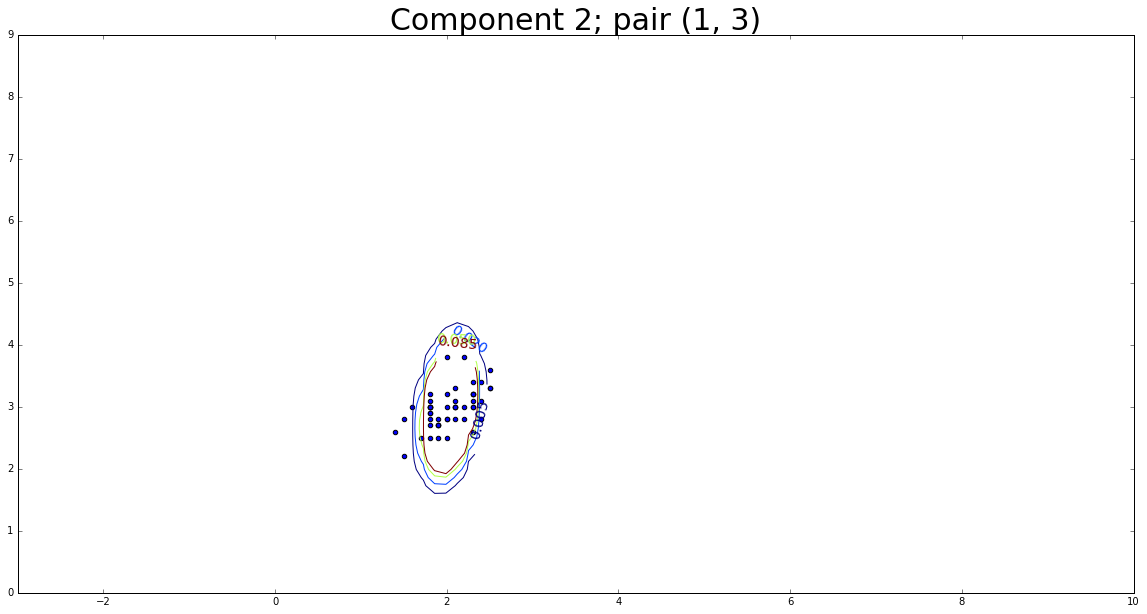

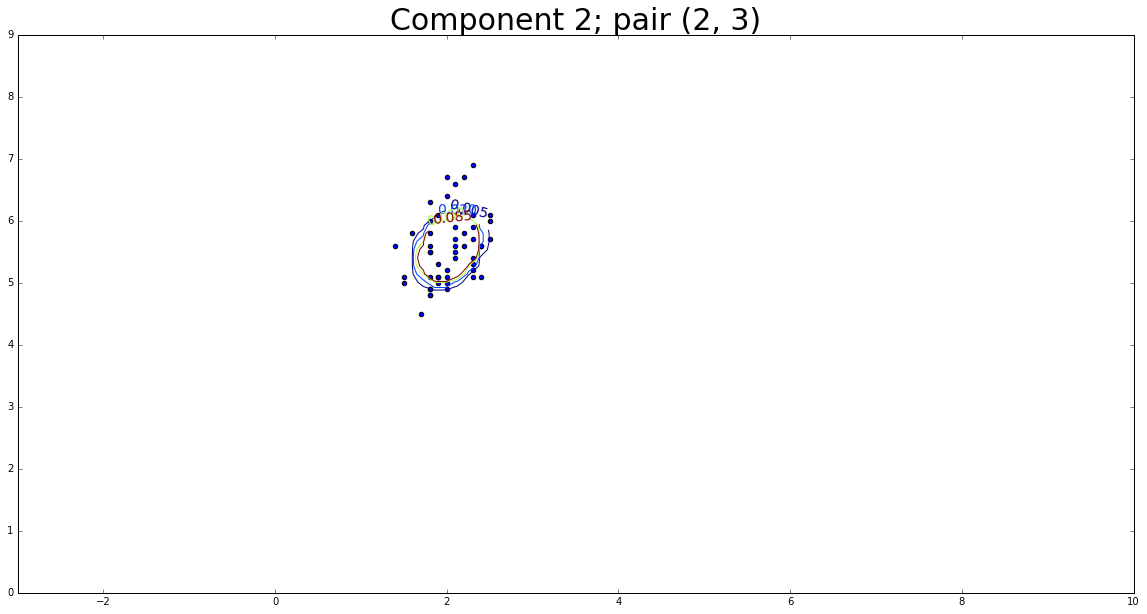

In [16]:
for i in range(3) :
    density_for_component(i, 0, 1)
    density_for_component(i, 1, 3)
    density_for_component(i, 2, 3)
    

### Все смеси равновероятны - очевидно, т.к. кол-во векторов в каждой смеси одинаково.

## Далее вторая часть задания.

In [232]:
mean = np.zeros((3, 4))
for i in range(3) :
    mean[i] = type_[i].mean(axis=0)
mean[1]
cond_mean = np.array([(mean[1] + mean[2]) / 2,
                      (mean[2] + mean[0]) / 2,
                      (mean[0] + mean[1]) / 2])

### Посчитали условные матожидания 
### $E(X|T \neq 0)$
### $E(X|T \neq 1)$
### $E(X|T \neq 2)$
### выведем ниже.

In [222]:
print(cond_mean)

[[ 6.262  2.872  4.906  1.676]
 [ 5.797  3.196  3.508  1.135]
 [ 5.471  3.094  2.862  0.785]]


### Дальше пересчитаем матрицу ковариаций и точно также построим графики.

### ну и так далее...:)